In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator)
import matplotlib.font_manager as fm
sns.set(font_scale=1.2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['text.usetex'] = True

In [2]:
READ = "read"
INSERT = "insert"
UPDATE = "update"
SCAN = "scan"
FPTREE = "fptree"
LBTREE = "lbtree"
DPTREE = "dptree"
ROART = "roart"
HOT = "hot"
MASSTREE = "masstree"
BTREE = "btree"
BTREE_P = "btree_prefix"
BTREE_AP = "btree_adprefix"
THREADS = "Threads"
PACTREE = "pactree"

data = pd.read_csv("./dram_string.csv")
Threads = data[THREADS]
data = data / 1000000
data[THREADS] = Threads

df_read = data[["btree_read", "btree_prefix_read", "btree_adprefix_read", "masstree_read"]]
df_insert = data[["btree_insert", "btree_prefix_insert", "btree_adprefix_insert", "masstree_insert"]]
# df_update = data[["btree_update", "lbtree_update"]]
# df_scan = data[["btree_scan", "masstree_scan"]]

data

,Threads,btree_read,btree_insert,btree_prefix_read,btree_prefix_insert,btree_adprefix_read,btree_adprefix_insert,masstree_read,masstree_insert
0,1,0.612493,0.424400,0.647671,0.451459,0.742620,0.505894,0.861655,0.580747
1,5,3.178162,2.132977,3.321189,2.264431,3.657868,2.542628,4.501406,2.880822
2,10,6.384550,4.210950,6.648648,4.481159,7.284280,5.037755,9.063117,5.614155
3,20,12.841636,8.374388,13.365055,8.933358,14.743876,9.904756,17.919256,10.733282
4,30,17.568895,10.753843,18.053027,11.134927,19.799487,12.449038,24.832153,13.493475
5,40,22.327170,14.045723,22.709366,14.489648,25.173410,16.342003,31.359393,16.430307
6,60,28.999196,18.018241,29.068074,19.017632,31.841970,21.440854,35.100110,16.591205
7,80,35.307089,20.499604,34.043764,20.522072,37.801879,22.387887,38.277107,15.812004


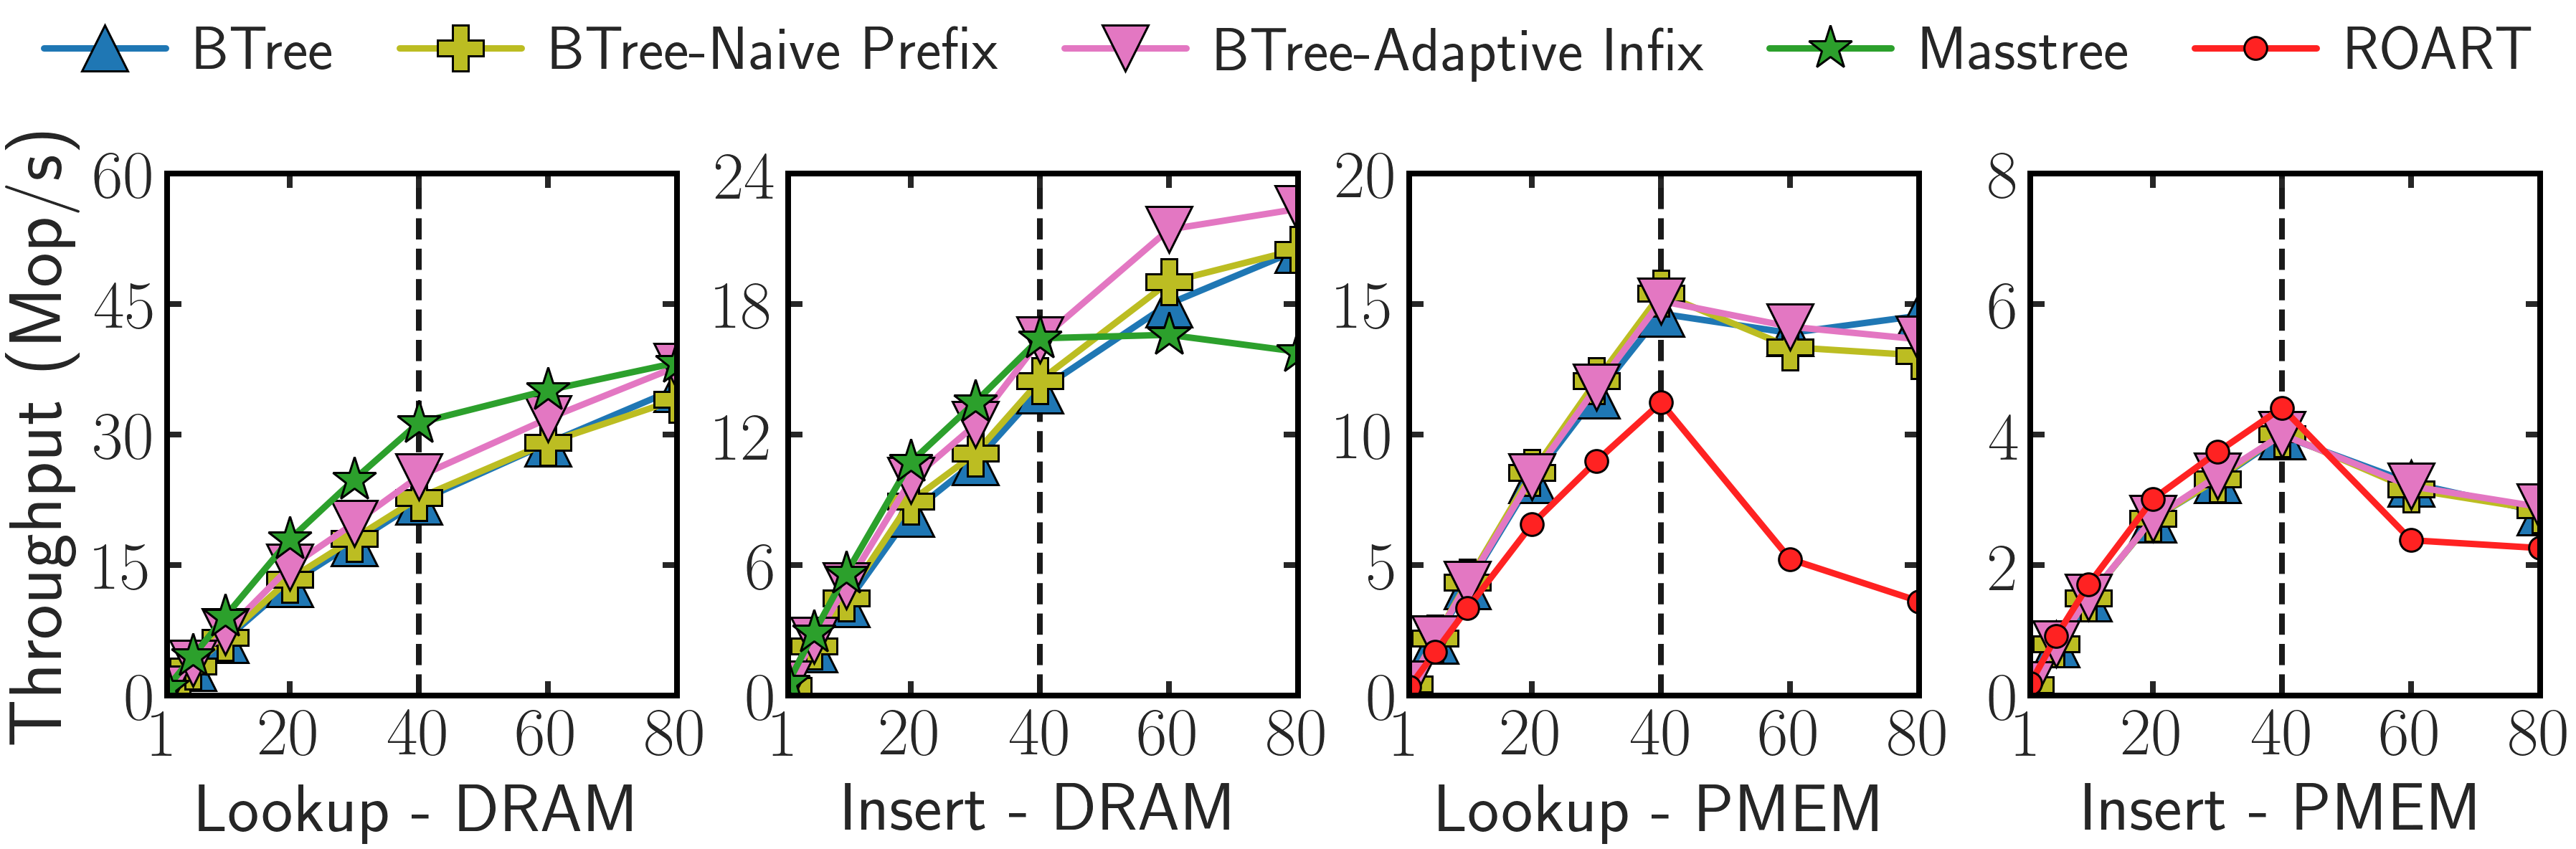

In [3]:
fontsize = 95
myfont = fm.FontProperties(family="Calibri", size=fontsize)

axs = []
fig = plt.figure(figsize=(50,14))
for i in range(141, 145):
    axs.append(fig.add_subplot(i))

for i in range(4):
    axs[i].axvline(x = 40, color='k', linestyle='dashed', linewidth = 8)

operations = [READ, INSERT]
trees = [BTREE, BTREE_P, BTREE_AP, MASSTREE]

# colors=['#60AE47', '#E19153', '#EA96A3', '#4BABA4', '#6DAEE2', '#B6A8EB', '#DF8FE7']
# markers = ['v', '^', 's', 'o', '*', '<', '>']
colors=['#1F77B4', '#BCBD22','#E377C2', '#2CA02C', '#8C564B', '#FF7F0E',  '#7F7F7F', '#17BECF']
markers = ['^','P','v',"*",'<','s']

i = 0
j = 0
for operation in operations:
    i += 1
    for tree in trees:
        j = j + 1 if (j % len(trees) == j) else 1  # counter for color & marker
        Y = tree + "_" + operation
        axs[i-1].plot(data[THREADS], data[Y], linewidth=9, \
                    color=colors[j-1], marker=markers[j-1], \
                    markersize=fontsize*2/3, markeredgecolor="black", markeredgewidth=3, \
                    label=data[Y].name)

axs[0].set_xlabel('Lookup - DRAM', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[1].set_xlabel('Insert - DRAM', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[2].set_xlabel('Lookup - PMEM', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[3].set_xlabel('Insert - PMEM', \
                  fontsize=fontsize, fontname='Calibri', labelpad=20, linespacing=1)
axs[0].set_ylabel('Throughput (Mop/s)', fontsize=fontsize*1.1, fontname='Calibri', labelpad=20)

for i in range(0, 2):
    axs[i].grid(False)
    axs[i].set_xticks([1, 20, 40, 60, 80])
    axs[i].spines['bottom'].set_color('black')
    axs[i].spines['bottom'].set_linewidth(8)
    axs[i].spines['top'].set_color('black')
    axs[i].spines['top'].set_linewidth(8)
    axs[i].spines['right'].set_color('black')
    axs[i].spines['right'].set_linewidth(8)
    axs[i].spines['left'].set_color('black')
    axs[i].spines['left'].set_linewidth(8)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].patch.set_facecolor('white')
    axs[i].tick_params(direction="in")
    axs[i].tick_params(axis='both', length=20, width=8, which='major', pad=15)
    axs[i].margins(0)
    for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        label.set_fontsize(fontsize)
        
axs[0].set_ylim([0, 60])
axs[0].set_yticks([0, 15, 30, 45, 60])
axs[1].set_ylim([0, 24])
axs[1].set_yticks([0, 6, 12, 18, 24])




# PM

data = pd.read_csv("./pmem_string.csv")
Threads = data[THREADS]
data = data / 1000000
data[THREADS] = Threads

df_read = data[["btree_read", "btree_prefix_read", "btree_adprefix_read", "roart_read"]]
df_insert = data[["btree_insert", "btree_prefix_insert", "btree_adprefix_insert", "roart_insert"]]

operations = [READ, INSERT]
trees = [BTREE, BTREE_P, BTREE_AP, ROART]

colors=['#1F77B4', '#BCBD22','#E377C2', '#FF2222', '#2CA02C', '#FF7F0E',  '#7F7F7F', '#17BECF']
markers = ['^','P','v',".",'<','*']

i = 2
j = 0
for operation in operations:
    i += 1
    for tree in trees:
        j = j + 1 if (j % len(trees) == j) else 1  # counter for color & marker
        Y = tree + "_" + operation
        line = axs[i-1].plot(data[THREADS], data[Y], linewidth=9, \
                    color=colors[j-1], marker=markers[j-1], \
                    markersize=fontsize*2/3, markeredgecolor="black", markeredgewidth=3, \
                    label=data[Y].name)

for i in range(2, 4):
    axs[i].grid(False)
    axs[i].set_xticks([1, 20, 40, 60, 80])
    axs[i].spines['bottom'].set_color('black')
    axs[i].spines['bottom'].set_linewidth(8)
    axs[i].spines['top'].set_color('black')
    axs[i].spines['top'].set_linewidth(8)
    axs[i].spines['right'].set_color('black')
    axs[i].spines['right'].set_linewidth(8)
    axs[i].spines['left'].set_color('black')
    axs[i].spines['left'].set_linewidth(8)
    axs[i].yaxis.set_ticks_position('both')
    axs[i].xaxis.set_ticks_position('both')
    axs[i].patch.set_facecolor('white')
    axs[i].tick_params(direction="in")
    axs[i].tick_params(axis='both', length=20, width=8, which='major', pad=15)
    axs[i].margins(0)
    for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        label.set_fontsize(fontsize)
        
axs[2].set_ylim([0, 20])
axs[2].set_yticks([0, 5, 10, 15, 20])
axs[3].set_ylim([0, 8])
axs[3].set_yticks([0, 2, 4, 6, 8])


lines, labels = axs[0].get_legend_handles_labels()
labels = ["BTree", "BTree-Naive Prefix", "BTree-Adaptive Infix", "Masstree", "ROART"]
legend = fig.legend(lines + line, labels, columnspacing=1, handletextpad=0.5, fontsize=fontsize+10, prop=fm.FontProperties(family="Calibri", size=85), frameon=False, bbox_to_anchor=(0,1,1,0.2), loc="center", borderaxespad=0, ncol=5)
frame = legend.get_frame()
frame.set_facecolor('none')
frame.set_edgecolor('none')

plt.tight_layout(w_pad=1, h_pad=1)
plt.savefig("./string_enwiki.pdf", bbox_inches='tight', pad_inches=0) 
plt.show()
